In [1]:
pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas


  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp312-cp312-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Step 1: Load and Prepare the Breast Cancer Dataset
def load_and_prepare_data():
    """
    Load the breast cancer dataset and prepare it for feature selection and training.

    Returns:
        df: Full dataset as a pandas DataFrame
        X: Features as a NumPy array
        y: Target as a NumPy array
        feature_names: Feature names
        target_names: Target names
    """
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)  # Create DataFrame with feature data
    df['target'] = data.target  # Add target column
    feature_names = data.feature_names
    target_names = data.target_names

    # Data overview
    print("Dataset Head:\n", df.head())
    print("\nDataset Info:")
    print(df.info())

    # Check for missing values
    if df.isnull().sum().sum() == 0:
        print("\nNo missing values in the dataset.")
    else:
        print("\nMissing values found. Consider handling them.")

    X = df.drop(columns=['target']).values  # Features
    y = df['target'].values  # Target

    return df, X, y, feature_names, target_names

In [3]:
# Step 2: Feature Selection
def select_features(X, y, k=10):
    """
    Select the top k features using SelectKBest.

    Args:
        X: Feature dataset
        y: Target dataset
        k: Number of top features to select

    Returns:
        X_selected: Transformed feature set with selected features
        selected_features: List of selected feature names
    """
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)  # Apply feature selection
    selected_features = np.array(feature_names)[selector.get_support()]  # Get selected feature names

    print(f"\nTop {k} Selected Features:")
    for feature in selected_features:
        print(feature)

    return X_selected, selected_features


In [4]:
# Step 3: Data Splitting and Scaling
def split_and_scale_data(X, y, scaler_file="scaler.pkl"):
    """
    Split the dataset into training and testing sets, and scale the features.
    Saves the scaler object to a pickle file for later use.

    Args:
        X (array-like): Features dataset
        y (array-like): Target labels
        scaler_file (str): File path to save the scaler

    Returns:
        X_train, X_test, y_train, y_test (arrays): Scaled training and testing sets
    """
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Save the scaler to a pickle file
    with open(scaler_file, "wb") as file:
        pickle.dump(scaler, file)
    print(f"Scaler saved to {scaler_file}")

    return X_train, X_test, y_train, y_test


In [5]:
# Step 4: Create and Train the ANN Model
def train_ann_model(X_train, y_train, hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=500, model_file="ann_model.pkl"):
    """
    Train an Artificial Neural Network (ANN) model and save it to a pickle file.

    Args:
        X_train (array-like): Training feature set
        y_train (array-like): Training target set
        hidden_layer_sizes (tuple): Hidden layer configuration
        activation (str): Activation function ('relu', 'tanh', etc.)
        solver (str): Optimization algorithm ('adam', 'sgd', etc.)
        max_iter (int): Maximum number of iterations for optimization
        model_file (str): File path to save the trained model

    Returns:
        model: Trained MLPClassifier model
    """
    # Initialize and train the model
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )
    model.fit(X_train, y_train)  # Train the model

    print("\nModel Training Complete!")

    # Save the trained model to a pickle file
    with open(model_file, "wb") as file:
        pickle.dump(model, file)
    print(f"Model saved to {model_file}")

    return model

In [6]:
# Step 5: Model Evaluation
def evaluate_model(model, X_test, y_test, target_names):
    """
    Evaluate the trained model using accuracy, classification report, and confusion matrix.

    Args:
        model: Trained ANN model
        X_test: Test feature set
        y_test: Test target set
        target_names: Names of target classes
    """
    # Make predictions
    y_pred = model.predict(X_test)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy:.2f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

Dataset Head:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

c:\Users\sanga\OneDrive\Documents\3rd Semester\Neural Networks and Deep Learning\Assignment 4\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


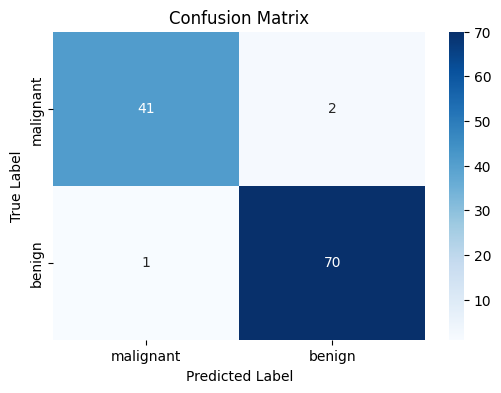

In [7]:
# Step 6: Main Pipeline
df, X, y, feature_names, target_names = load_and_prepare_data()
X_selected, selected_features = select_features(X, y, k=10)
X_train, X_test, y_train, y_test = split_and_scale_data(X_selected, y, scaler_file="scaler.pkl")
ann_model = train_ann_model(X_train, y_train, hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, model_file="ann_model.pkl")
evaluate_model(ann_model, X_test, y_test, target_names)